# Lab 5: Regression and Dimensionality Reduction (2%)

# Craig Phayer - 21340633

Lab 5 builds on top of Lab 4  by introducing dimensionality reduction into the process of training and comparing predictive models (i.e., classification and regression models). In general, the more features/columns a dataset has (with a fixed number of examples), the more difficult might be to train an accurate predictive model. For datasets with a large number of features, it is almost always necessary to either

- select the most important features or
- transform the features to reduce the dimensionality of the feature space

before training a model. Similar to data preparation dimensionality reduction needs to be done separately for the training and the test sets.

The first goal of Lab 5 is to understand how to introduce dimensionality reduction techniques into the training pipeline. This time we will use regression algorithms (i.e., algorithms for numeric prediction) instead of classifiers, but the same dimensionality reduction techniques can be used in classification pipelines. **The second goal is to practice training regression models.**

## Task 1
- [Lab 5 - Regression and Dimensionality Reduction.ipynb](https://learn.ul.ie/content/enforced/49261-CS4168_SEM2_2024_5/Lab%205%20-%20Regression%20and%20Dimensionality%20Reduction.ipynb) - This is the example notebook to use in the lab.
- [fish.csv](https://learn.ul.ie/content/enforced/49261-CS4168_SEM2_2024_5/fish.csv) - This is the dataset used in the example notebook.
- [insurance.csv](https://learn.ul.ie/content/enforced/49261-CS4168_SEM2_2024_5/insurance.csv) - This is the dataset to use in Tasks 2 and 3.

## Task 2
- Repeat the experiment in Lab5 - Regression and Dimensionality Reduction.ipynb with insurance.csv and draw conclusions from the results you observe in a markdown cell. Add a third regression algorithm of your choice. Describe how it compares to Random Forest and Linear regression in a markdown cell **(max 250 words in a markdown cell).**

## Task 3
- Add two dimensionality-reduction methods which are not used in CS5062 - Lab5 - Regression and Dimensionality Reduction.ipynb to the training pipelines for insurance.csv. Aim at dimensionality reduction techniques that are sufficiently different from the ones used in the example notebook. Draw conclusions from the results you observe in a markdown cell **(max 250 words in a markdown cell).**


In [27]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core.common import random_state

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import SelectKBest, f_regression

import warnings

warnings.simplefilter("ignore")

In [12]:
df = pd.read_csv('../Data/insurance.csv')
df.head(10)

,age,gender,bmi,children,smoker,region,insurance_cost
0,18,male,33.770,1,no,southeast,1725.55230
1,18,male,34.100,0,no,southeast,1137.01100
2,18,female,26.315,0,no,northeast,2198.18985
3,18,female,38.665,2,no,northeast,3393.35635
4,18,female,35.625,0,no,northeast,2211.13075
5,18,male,31.680,2,yes,southeast,34303.16720
6,18,female,30.115,0,no,northeast,21344.84670
7,18,male,23.750,0,no,northeast,1705.62450
8,18,male,25.175,0,yes,northeast,15518.18025
9,18,female,36.850,0,yes,southeast,36149.48350


In [13]:
df.tail(10)

,age,gender,bmi,children,smoker,region,insurance_cost
1328,64,male,38.190,0,no,northeast,14410.93210
1329,64,female,22.990,0,yes,southeast,27037.91410
1330,64,male,37.905,0,no,northwest,14210.53595
1331,64,female,39.700,0,no,southwest,14319.03100
1332,64,female,35.970,0,no,southeast,14313.84630
1333,64,female,31.825,2,no,northeast,16069.08475
1334,64,female,26.885,0,yes,northwest,29330.98315
1335,64,male,26.410,0,no,northeast,14394.55790
1336,64,male,36.960,2,yes,southeast,49577.66240
1337,64,male,23.760,0,yes,southeast,26926.51440


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   gender          1338 non-null   object 
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   object 
 5   region          1338 non-null   object 
 6   insurance_cost  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
df.describe()

,age,bmi,children,insurance_cost
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
df.isna().sum()

age               0
gender            0
bmi               0
children          0
smoker            0
region            0
insurance_cost    0
dtype: int64

gender
male      676
female    662
Name: count, dtype: int64


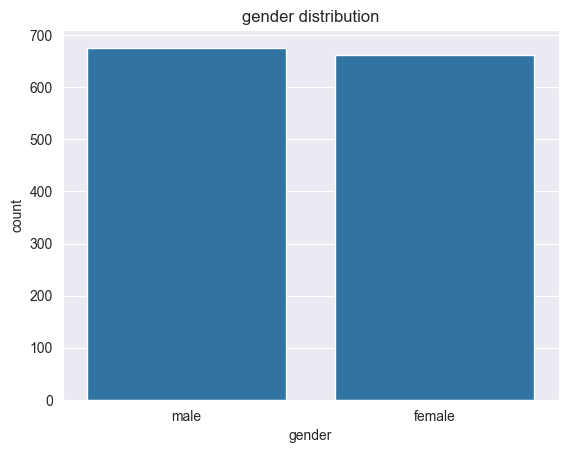

smoker
no     1064
yes     274
Name: count, dtype: int64


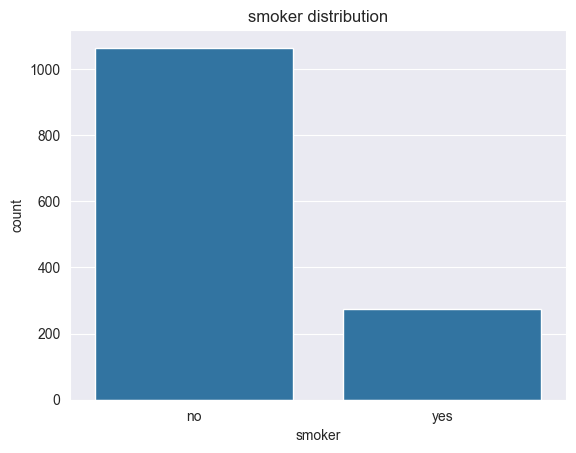

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


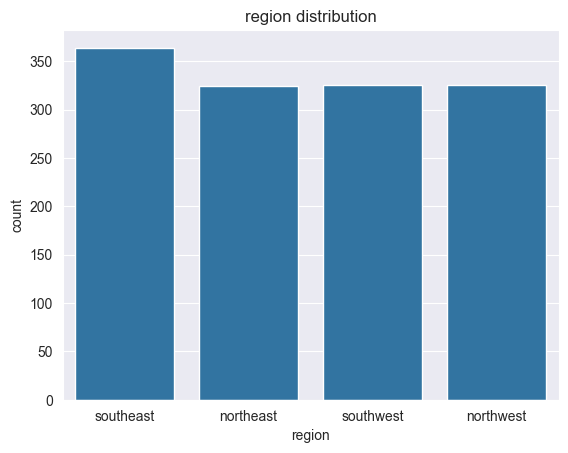

In [17]:
# Categorical column distributions
for col in ['gender', 'smoker', 'region']:
    print(df[col].value_counts())
    sns.countplot(data=df, x=col)
    plt.title(f"{col} distribution")
    plt.show()

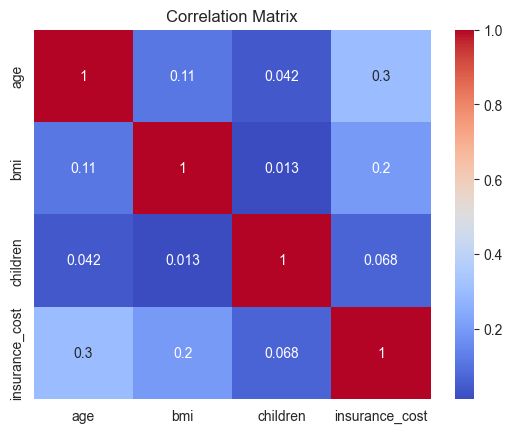

In [18]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

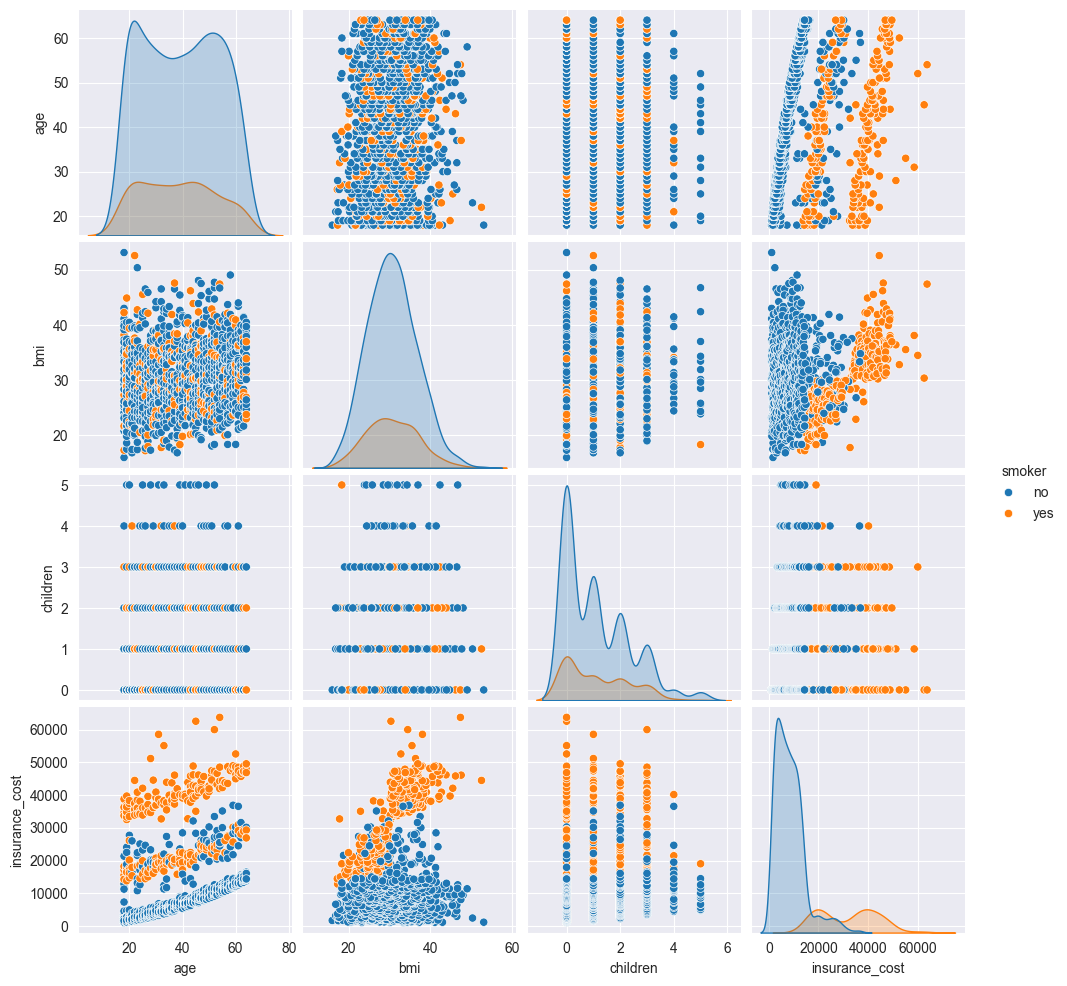

In [19]:
# Visualize relationships with charges
sns.pairplot(df, hue="smoker")
plt.show()

In [20]:
# Preprocessing
X = df.drop("insurance_cost", axis=1)
y = df["insurance_cost"]

categorical_features = ['gender', 'smoker', 'region']
numerical_features = ['age', 'children', 'bmi']

preprocessor_pipeline = ColumnTransformer(
    [('num', StandardScaler(), numerical_features),
     ('cat', OneHotEncoder(), categorical_features)]
)

In [24]:
# Training and Evaluation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipelines
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}
results = []

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor_pipeline),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "MSE": mse, "R2": r2})
    print(f"{name} MSE: {mse:.2f}, R2: {r2:.2f}")

results = pd.DataFrame(results)

Random Forest MSE: 19093714.53, R2: 0.86
Linear Regression MSE: 36000021.71, R2: 0.75
Gradient Boosting MSE: 16967201.40, R2: 0.88


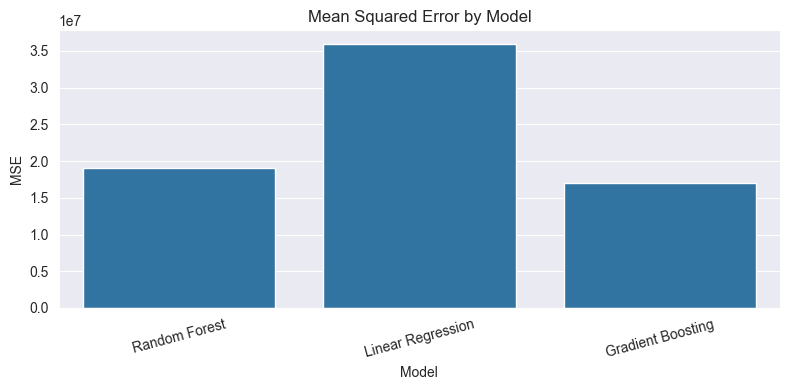

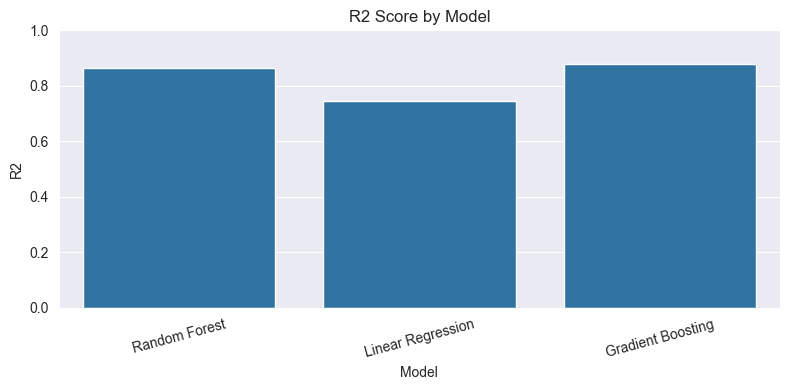

In [26]:
# Plot MSE
plt.figure(figsize=(8, 4))
sns.barplot(data=results, x="Model", y="MSE")
plt.title("Mean Squared Error by Model")
plt.ylabel("MSE")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Plot R2
plt.figure(figsize=(8, 4))
sns.barplot(data=results, x="Model", y="R2")
plt.title("R2 Score by Model")
plt.ylabel("R2")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

### Task - 2 Conclusion
#### Performance comparison between Linear regression, Random Forest and Gradient Boosting.
- **Linear Regression** performed poorly when compared to the other 2 models with a high MSE and lower R2 score than them. Linear models are too simple for more complex relationships between features some of which might be present here and could explain the lower score than the other 2 models.

- **Random Forest** and **Gradient Boosting** performed very similarly but Gradient Boosting slightly outperformed Random Forest in both MSE and R2 score. This is likely due to the fact that Gradient Boosting is a more advanced ensemble method that builds trees sequentially, allowing it to capture complex relationships in the data better than Random Forest which builds trees independently.

In [29]:
# Truncated SVD pipeline
svd_pipeline = Pipeline([
    ('preprocessor', preprocessor_pipeline),
    ('svd', TruncatedSVD(n_components=5)),
    ('regressor', LinearRegression())
])
svd_pipeline.fit(X_train, y_train)
svd_pred = svd_pipeline.predict(X_test)
print("TruncatedSVD - MSE:", mean_squared_error(y_test, svd_pred), "R2:", r2_score(y_test, svd_pred))

# SelectKBest pipeline
kbest_pipeline = Pipeline([
    ('preprocessor', preprocessor_pipeline),
    ('kbest', SelectKBest(f_regression, k=5)),
    ('regressor', LinearRegression())
])
kbest_pipeline.fit(X_train, y_train)
kbest_pred = kbest_pipeline.predict(X_test)
print("SelectKBest - MSE:", mean_squared_error(y_test, kbest_pred), "R2:", r2_score(y_test, kbest_pred))

TruncatedSVD - MSE: 36088647.37469195 R2: 0.7445030895892244
SelectKBest - MSE: 35993245.388275586 R2: 0.7451785073327424


In [30]:
results = pd.DataFrame({
    'Method': ['TruncatedSVD', 'SelectKBest'],
    'MSE': [
        mean_squared_error(y_test, svd_pred),
        mean_squared_error(y_test, kbest_pred)
    ],
    'R2': [
        r2_score(y_test, svd_pred),
        r2_score(y_test, kbest_pred)
    ]
})

results

,Method,MSE,R2
0,TruncatedSVD,3.608865e+07,0.744503
1,SelectKBest,3.599325e+07,0.745179


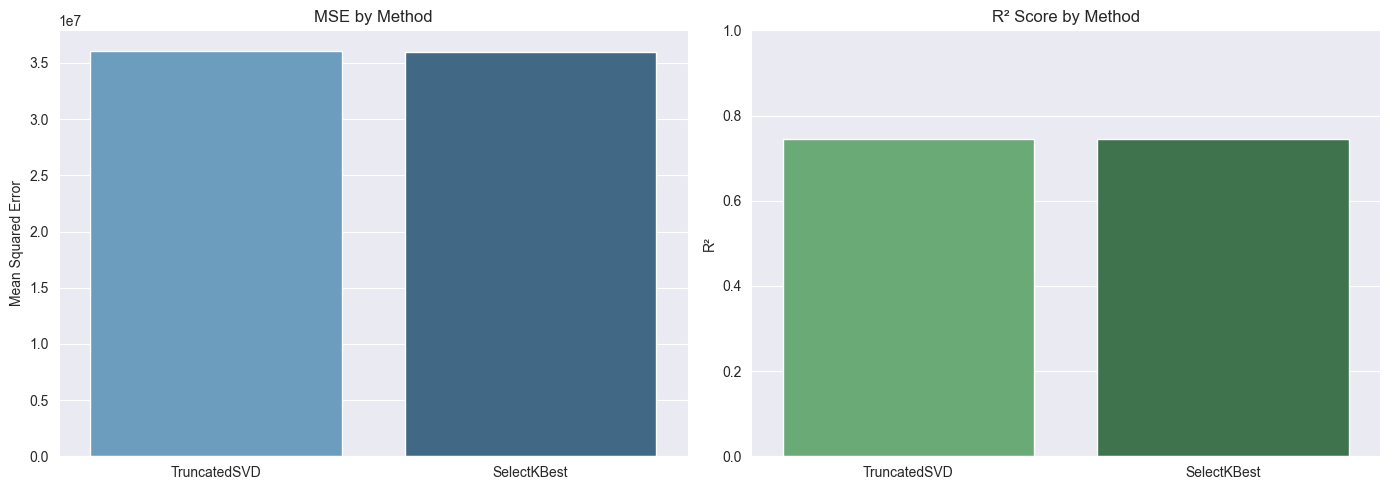

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# MSE Plot
sns.barplot(data=results, x='Method', y='MSE', ax=axes[0], palette='Blues_d')
axes[0].set_title("MSE by Method")
axes[0].set_ylabel("Mean Squared Error")
axes[0].set_xlabel("")

# R² Plot
sns.barplot(data=results, x='Method', y='R2', ax=axes[1], palette='Greens_d')
axes[1].set_title("R2 Score by Method")
axes[1].set_ylabel("R2")
axes[1].set_xlabel("")
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

### Task - 3 Conclusion
#### Performance comparison between Truncated SVD and SelectKBest.
- **Truncated SVD** (reduces the dimensionality of the dataset by projecting it onto a lower-dimensional subspace, effective when dealing with sparse data)\
    and **SelectKBest**(a feature selection method that selects the top k features based on statistical tests i.e. correlation with the target variable)\
    both performed very similarly but also similar to Linear regression with a higher MSE and lower R2 score than both **Random Forest** and **Gradient Boosting**. SelectKBest did perform the slightest bit better than TruncatedSVD.

- Both methods of dimensionality reduction performed without significant loss in prediction accuracy. But again the reason for there lower performance could be again more complex relationships between features and target variables. The choice of dimensionality reduction technique depends on the dataset characteristics and the need for interpretability versus reduced complexity.